In [1]:
from pathlib import Path
import sys
from logging import getLogger
import pandas as pd
logger = getLogger(__name__)



In [2]:
images_prefix = Path('Data/crop_part1')
# get list of all images in the directory
images = list(images_prefix.glob('*.jpg'))

df_metadata = pd.DataFrame(columns=['filename', 'age', 'gender'])
num_failed_image_names_to_parse = 0
for i, image in enumerate(images):
    filename = image.name
    try:
        age, gender, _, _ = filename.split('_')
    except ValueError:
        num_failed_image_names_to_parse += 1
    df_metadata.loc[i] = [filename, age, gender]

logger.info(f'Failed to parse {num_failed_image_names_to_parse} image names')

In [33]:
df_metadata['age'] = df_metadata['age'].astype(int)

In [34]:
from sklearn.model_selection import train_test_split

def split_dataset(df, test_size=0.2, val_size=0.25):
    # Create a new column for stratification
    df['strata'] = df['age'].astype(str) + "_" + df['gender'].astype(str)

    # Group less frequent classes into a single class
    counts = df['strata'].value_counts()
    df.loc[df['strata'].isin(counts[counts == 1].index), 'strata'] = 'rare_class'

    # Split into train+val and test
    df_train_val, df_test = train_test_split(df, test_size=test_size, stratify=df['strata'], random_state=42)

    # Split train+val into train and val
    df_train, df_val = train_test_split(df_train_val, test_size=val_size, stratify=df_train_val['strata'], random_state=42)

    # Drop the strata column
    df_train = df_train.drop(columns='strata')
    df_val = df_val.drop(columns='strata')
    df_test = df_test.drop(columns='strata')

    return df_train, df_val, df_test

df_train, df_val, df_test = split_dataset(df_metadata)


In [35]:
fig = px.histogram(df, x='age', color='gender', barmode='group',
                   category_orders={'gender': [0, 1]},
                   labels={'gender': 'Gender', 'age': 'Age'},
                   title='Distribution of Ages by Gender')
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Count')

fig.show()

In [36]:
df_metadata.to_csv('Data/metadata.csv', index=False)

In [44]:
import numpy as np
e = df_metadata['filename'][0]

In [50]:
from PIL import Image
img = Image.open('Data/crop_part1/'+e)

# turn to numpy array
# img = np.array(img)

In [46]:
img.shape

(200, 200, 3)

In [51]:
from torchvision import transforms


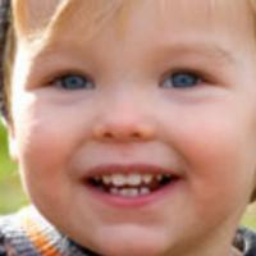

In [53]:
transforms.Resize(256)(img)

Can do weighting of each one but in interest of saving time lets 